In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

D:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
iris = load_iris()
iris_X, iris_Y = iris.data[:-1,:], iris.target[:-1]
iris_Y = pd.get_dummies(iris_Y).values
trainX, testX, trainY, testY = train_test_split(iris_X,iris_Y,
                                                test_size = 0.3, random_state = 42)


In [3]:
numFeatures = trainX.shape[1]
numLabels = trainY.shape[1]

X = tf.placeholder(tf.float32,[None, numFeatures], name = 'input')
y = tf.placeholder(tf.float32,[None,numLabels], name = 'ground_truth')

In [4]:
W = tf.Variable(tf.zeros([4,3]), name = 'weight')
b = tf.Variable(tf.zeros([3]), name = 'bias')

In [5]:
apply_weights = tf.matmul(X, W, name = 'apple_weights')
add_bias = tf.add(apply_weights, b , name = 'add_bias')
activation_op = tf.nn.sigmoid(add_bias, name = 'activation_op')

In [6]:
loss = tf.nn.l2_loss(activation_op - y, name = 'squared_error_cost')
num_epochs = 700
lr = tf.train.exponential_decay(learning_rate = 0.0008,
                               global_step = 1,
                               decay_steps = trainX.shape[0],
                               decay_rate = 0.95,
                               staircase = True)
training_op = tf.train.GradientDescentOptimizer(lr).minimize(loss)

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [8]:
correct_pred = tf.equal(tf.argmax(activation_op,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,'float'))
activation_summary = tf.summary.histogram('output', activation_op)
accuracy_summary = tf.summary.scalar('accuracy', accuracy)
cost_summary = tf.summary.scalar('cost', loss)
weight_summary = tf.summary.histogram('weights', W)
bias_summary = tf.summary.histogram('bias', b)
merged = tf.summary.merge([activation_summary,accuracy_summary
                          ,cost_summary,weight_summary,bias_summary])
write = tf.summary.FileWriter('summary_logs', sess.graph)

In [9]:
cost_init = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []

In [10]:
for i in range(num_epochs):
    if i > 1 and diff < 0.0001:
        print('chnage in cost %g; convergence.' %diff)
        break
    else:
        step = sess.run(training_op, feed_dict = {X: trainX, 
                                                 y: trainY})
        if i%10 == 0:
            epoch_values.append(i)
            train_acc, newCost = sess.run([accuracy, loss],feed_dict = {X: trainX,
                                                                       y: trainY})
            accuracy_values.append(train_acc)
            cost_values.append(newCost)
            diff = abs(newCost - cost_init)
            cost_init = newCost
            
            print("step: %d, training accuracy: %g, cost: %g, change in cost %g" 
                  %(i, train_acc, newCost, diff))
print('final accuracy on the test set: %s' %str(sess.run(accuracy, feed_dict = {X: testX,
                                                                               y: testY})))


step: 0, training accuracy: 0.346154, cost: 35.9518, change in cost 35.9518
step: 10, training accuracy: 0.413462, cost: 31.4632, change in cost 4.4886
step: 20, training accuracy: 0.644231, cost: 29.4469, change in cost 2.01628
step: 30, training accuracy: 0.644231, cost: 27.7466, change in cost 1.70032
step: 40, training accuracy: 0.644231, cost: 26.3353, change in cost 1.41131
step: 50, training accuracy: 0.644231, cost: 25.1705, change in cost 1.16482
step: 60, training accuracy: 0.644231, cost: 24.207, change in cost 0.96344
step: 70, training accuracy: 0.644231, cost: 23.4047, change in cost 0.802328
step: 80, training accuracy: 0.644231, cost: 22.7303, change in cost 0.674377
step: 90, training accuracy: 0.644231, cost: 22.1576, change in cost 0.572701
step: 100, training accuracy: 0.653846, cost: 21.6661, change in cost 0.491493
step: 110, training accuracy: 0.663462, cost: 21.24, change in cost 0.426151
step: 120, training accuracy: 0.663462, cost: 20.8669, change in cost 0.37

D:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


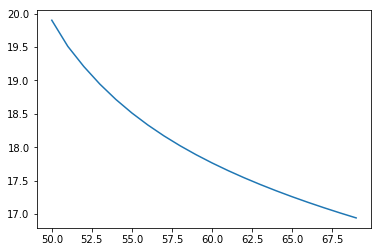

In [13]:
%matplotlib inline
plt.plot([np.mean(cost_values[i-50:i]) for i in range(len(cost_values))])
plt.show()